In [1]:
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
import contextily as cx
from shapely.geometry import box
import sys
from datetime import datetime, timedelta
from itertools import chain

from datetime import date


sys.path.insert(0, '/projects/old_shared/fire_weather_vis/base-fwi-vis/')
import fwiVis.fwiVis as fv

In [2]:
## Read in the other database data

censored = pd.read_csv("/projects/old_shared/fire_weather_vis/Lightning_analysis/Holdover_dataset/1_censored_data.csv")
uncensored = pd.read_csv("/projects/old_shared/fire_weather_vis/Lightning_analysis/Holdover_dataset/2_non_censored_data.csv")
ancill = pd.read_csv("/projects/old_shared/fire_weather_vis/Lightning_analysis/Holdover_dataset/3_ancillary_data.csv")


In [4]:
can_studies = ancill[ancill.Country == "Canada"].Study_id

In [10]:
censored[censored.Study_id.isin(can_studies)]

,Study_id,Reference,Time_interval,Time_interval_d,Lower_limit_d,Upper_limit_d,N_fires,RF,CRF,Original_data,Data_location,Collection_method
13,KOU1967CA01,Kourtz 1967,4 hour,0.166667,0.000000,0.166667,NaN,0.299000,0.299000,P,Table 7,Copied from original
14,KOU1967CA01,Kourtz 1967,4 hour,0.166667,0.166667,0.333333,NaN,0.048000,0.347000,P,Table 7,Copied from original
15,KOU1967CA01,Kourtz 1967,4 hour,0.166667,0.333333,0.500000,NaN,0.047000,0.394000,P,Table 7,Copied from original
16,KOU1967CA01,Kourtz 1967,4 hour,0.166667,0.500000,0.666667,NaN,0.062000,0.456000,P,Table 7,Copied from original
17,KOU1967CA01,Kourtz 1967,4 hour,0.166667,0.666667,0.833333,NaN,0.074000,0.530000,P,Table 7,Copied from original
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,WOT2022CA06,Wotton 2022,1 day,1.000000,17.000000,18.000000,38.0,0.004747,0.988757,N,NaN,Personal communication
2307,WOT2022CA06,Wotton 2022,1 day,1.000000,18.000000,19.000000,23.0,0.002873,0.991630,N,NaN,Personal communication
2308,WOT2022CA06,Wotton 2022,1 day,1.000000,19.000000,20.000000,26.0,0.003248,0.994878,N,NaN,Personal communication
2309,WOT2022CA06,Wotton 2022,1 day,1.000000,20.000000,21.000000,21.0,0.002623,0.997502,N,NaN,Personal communication


In [36]:
censored.columns

Index(['Study_id', 'Reference', 'Time_interval', 'Time_interval_d',
       'Lower_limit_d', 'Upper_limit_d', 'N_fires', 'RF', 'CRF',
       'Original_data', 'Data_location', 'Collection_method'],
      dtype='object')

<AxesSubplot: >

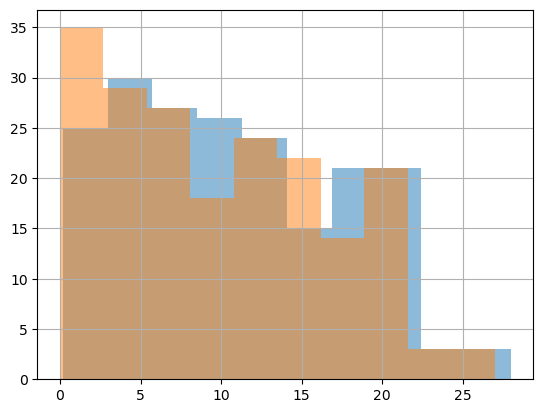

In [48]:
censored[censored.Study_id.isin(can_studies)].Upper_limit_d.hist(alpha = 0.5)

censored[censored.Study_id.isin(can_studies)].Lower_limit_d.hist(alpha = 0.5)

In [49]:
print(censored[censored.Study_id.isin(can_studies)].Upper_limit_d.max())
print(censored[censored.Study_id.isin(can_studies)].Lower_limit_d.max())

28.0
27.0


In [52]:
print(len(censored[censored.Study_id.isin(can_studies)].Study_id.unique()))
print(len(censored[censored.Study_id.isin(can_studies)]))


10
196


In [34]:

not_in_uncensored = ['KOU1967CA01', 'NAS1996CA01', 'WOT2005CA01', 'HES2022CA01','WOT2022CA01', 'WOT2022CA02', 'WOT2022CA03', 'WOT2022CA04','WOT2022CA05', 'WOT2022CA06']

tmp = can_studies[~can_studies.isin(not_in_uncensored)]

uncensored[tmp]

""
0
1
2
3
4
...
6296
6297
6298
6299


In [35]:
tmp

Series([], Name: Study_id, dtype: object)

In [31]:
tmp.remove()

TypeError: remove() takes exactly one argument (0 given)